<a href="https://colab.research.google.com/github/Deepthi-nagella/AIML/blob/main/AIML_III_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.shape

(1025, 14)

In [ ]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [ ]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,No,1.0,0,2,normal,No_disease
1,53,Male,0,140,203,1,0,155,Yes,3.1,0,0,normal,No_disease
2,70,Male,0,145,174,0,1,125,Yes,2.6,0,0,normal,No_disease
3,61,Male,0,148,203,0,1,161,No,0.0,0,1,normal,No_disease
4,62,Female,0,138,294,1,1,106,No,1.9,0,3,reversable_defect,No_disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

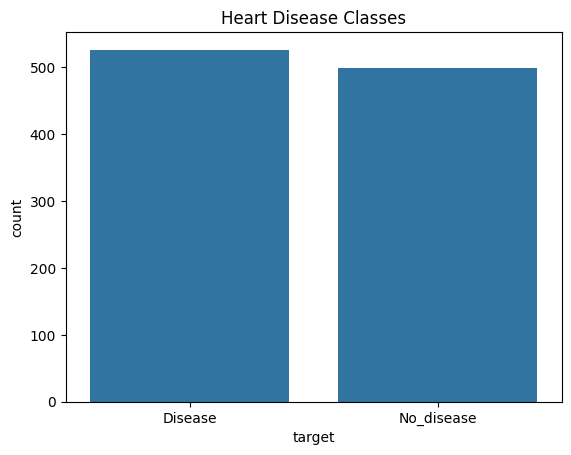

In [ ]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

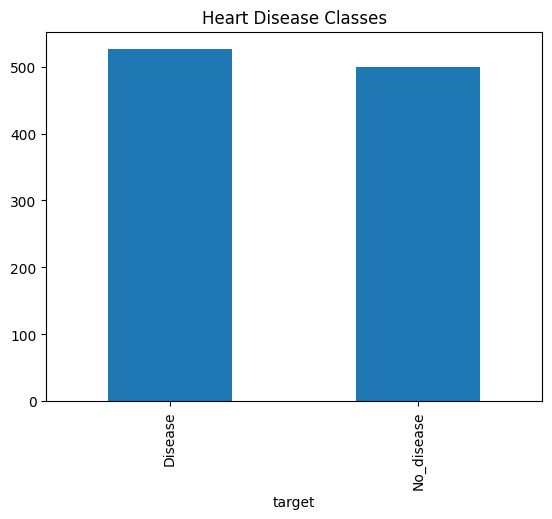

In [ ]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

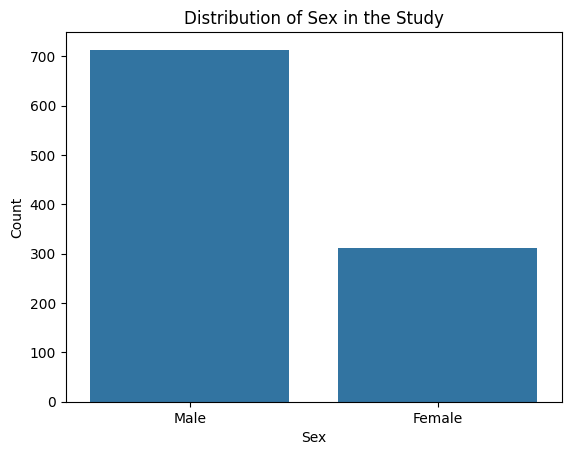

In [ ]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do
# Plotting the distribution of sex
sns.countplot(x='sex', data=data)
plt.title('Distribution of Sex in the Study')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


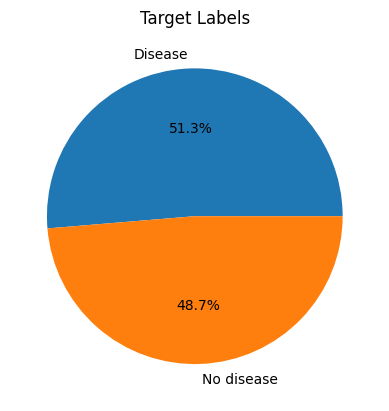

In [ ]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

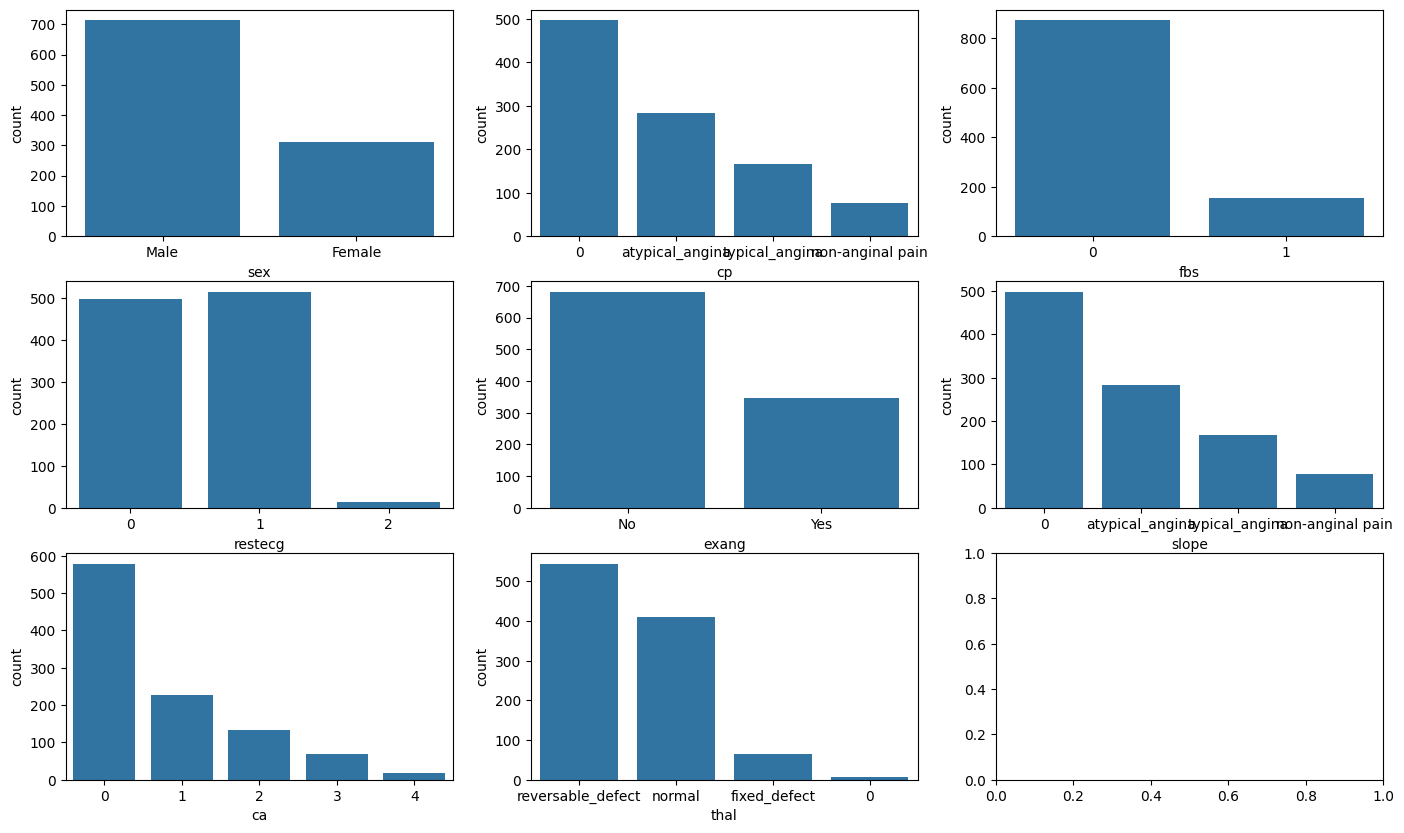

In [ ]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

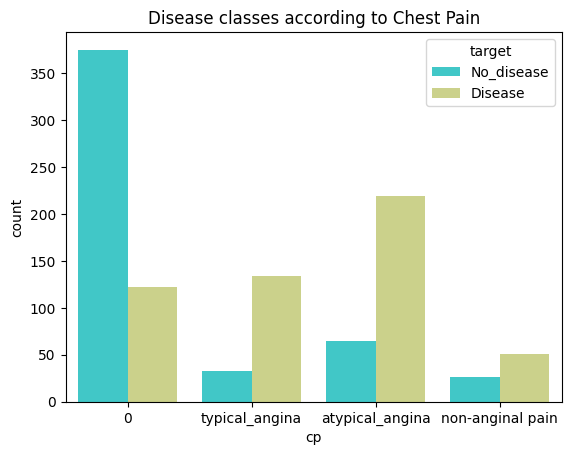

In [ ]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

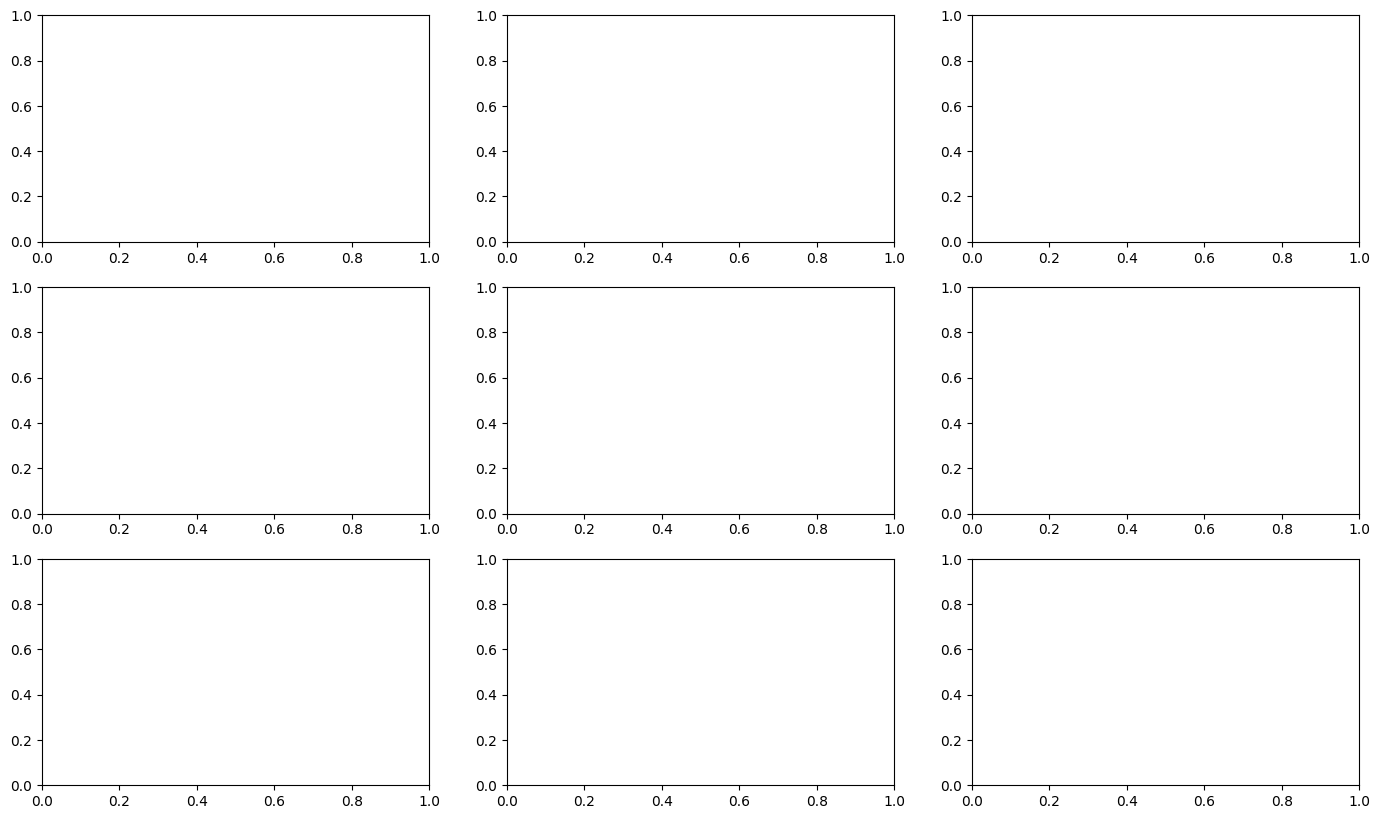

In [ ]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


In [ ]:
# Visualising the distribution of the continous variables

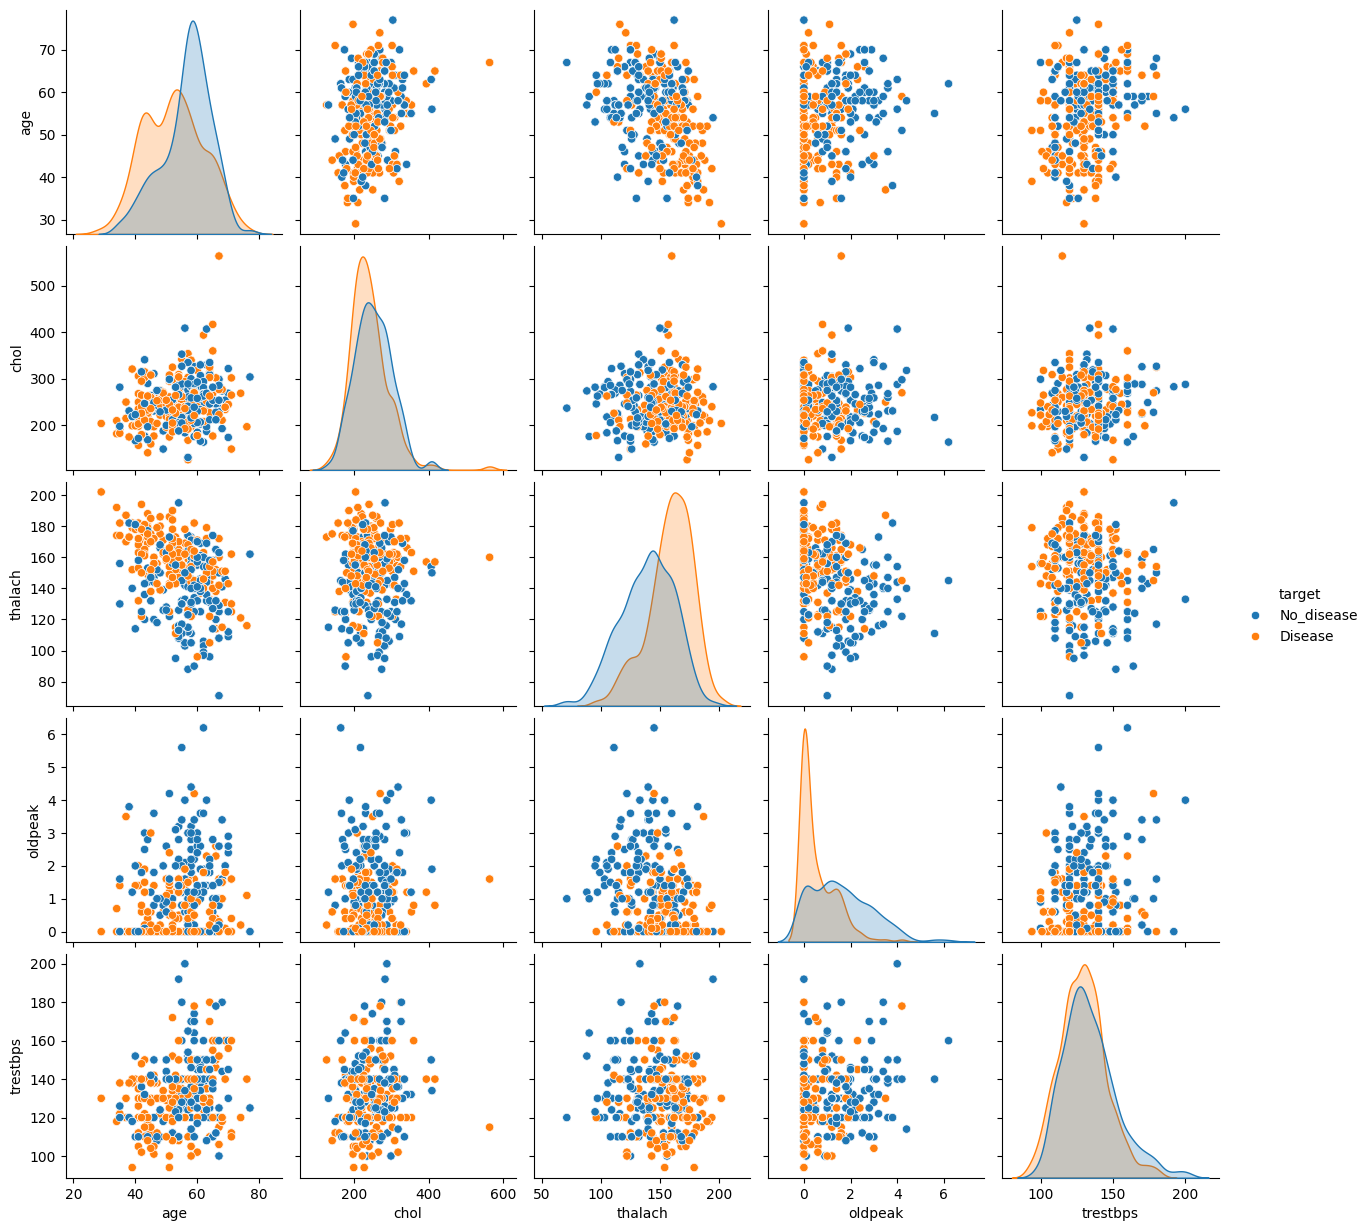

In [ ]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

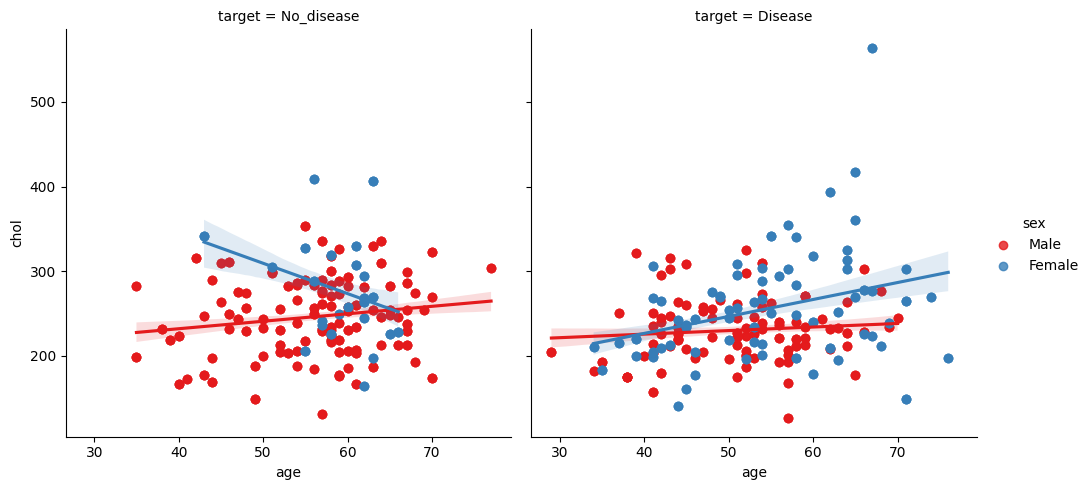

In [ ]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

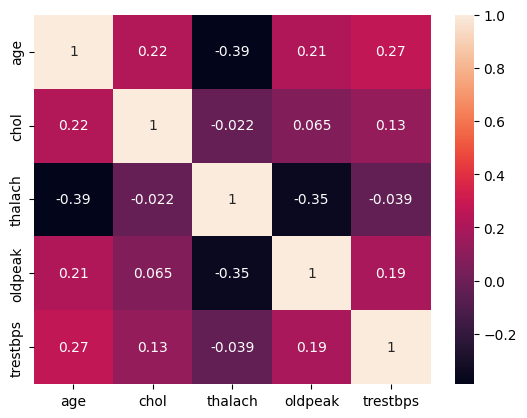

In [ ]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

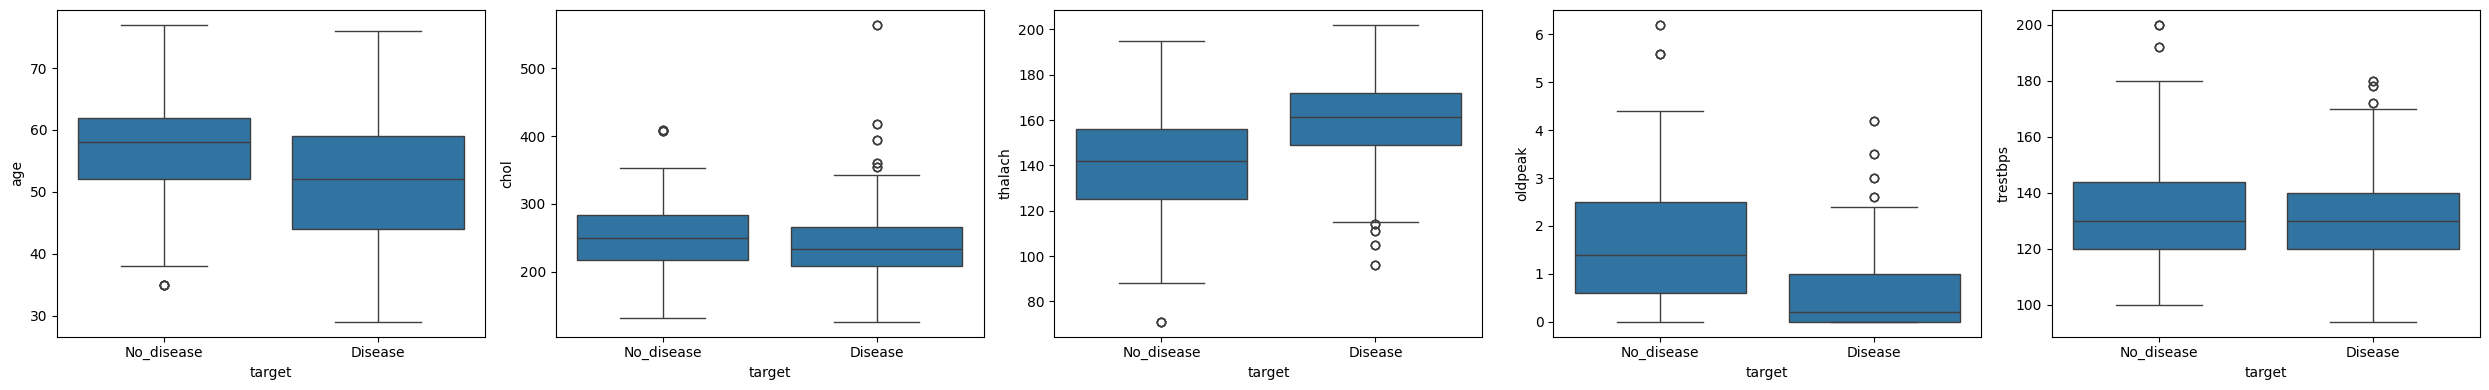

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

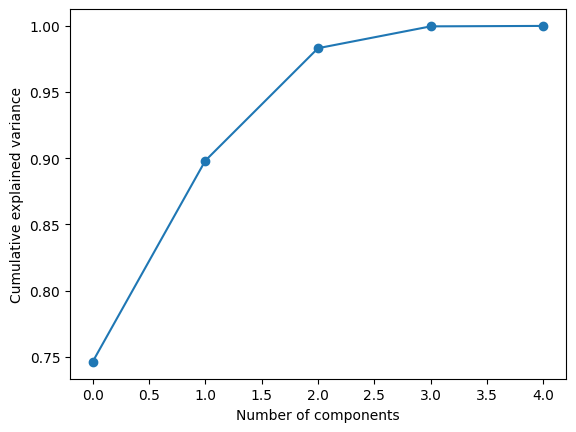

In [ ]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


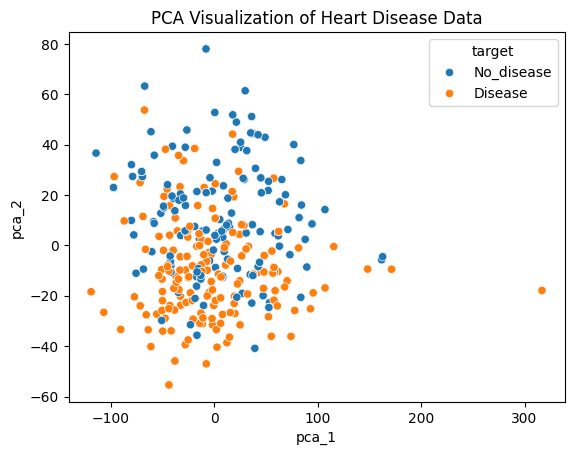

In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


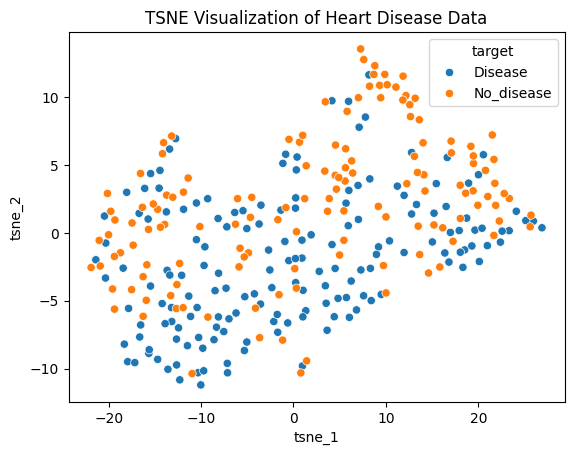

In [ ]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

Count the number of samples with Disease
Answer is 51.32 % and code is below

In [ ]:
disease_count = data[data['target'] == 'Disease'].shape[0]

# Total number of samples
total_count = data.shape[0]

# Calculate the percentage of samples with Disease
percentage_with_disease = (disease_count / total_count) * 100

print(f"Percentage of Samples with Disease: {percentage_with_disease:.2f}%")


Percentage of Samples with Disease: 51.32%


2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?

Ans is Age,Chol,Thalach

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# List of continuous features to test
continous_features = ['age', 'chol', 'thalach', 'oldpeak', 'trestbps']

# Initialize a dictionary to store p-values
p_values = {}

# Perform t-tests for each continuous feature
for feature in continous_features:
    # Separate the data into two groups based on disease status
    group1 = data[data['target'] == 'Disease'][feature]
    group2 = data[data['target'] == 'No_disease'][feature]

    # Perform the t-test
    t_stat, p_value = ttest_ind(group1, group2)
    p_values[feature] = p_value

# Find features with significant p-values
significant_features = {k: v for k, v in p_values.items() if v < 0.05}

print("Significant Features with p-values:")
print(significant_features)


Significant Features with p-values:
{'age': 1.0677220241596988e-13, 'chol': 0.0013525712504626976, 'thalach': 9.962970840353808e-46, 'oldpeak': 2.141338038132592e-49, 'trestbps': 8.233014978865774e-06}


3.Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?

ANS:Yes, you can visualize the separation in terms of the presence or absence of disease using PCA and t-SNE plots.

4.What is the optimal number of principal components in our case?

Ans:8

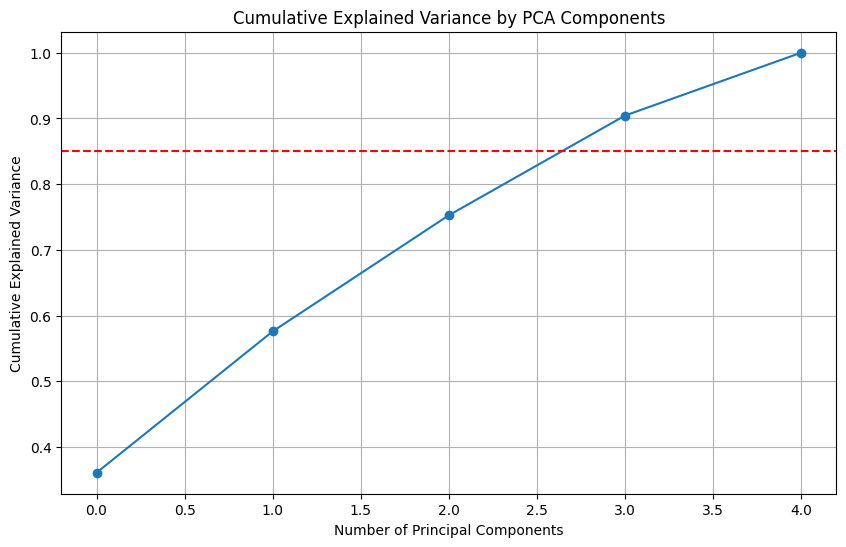

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the continuous features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[continous_features])

# Fit PCA
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Optionally, add a horizontal line for a threshold (e.g., 0.85 for 85% variance)
plt.axhline(y=0.85, color='r', linestyle='--')
plt.show()


5.what are the continous features with the highest correation with each other?

ans:age,thalach


Features with the highest correlation: ('age', 'thalach')
Correlation value: 0.39


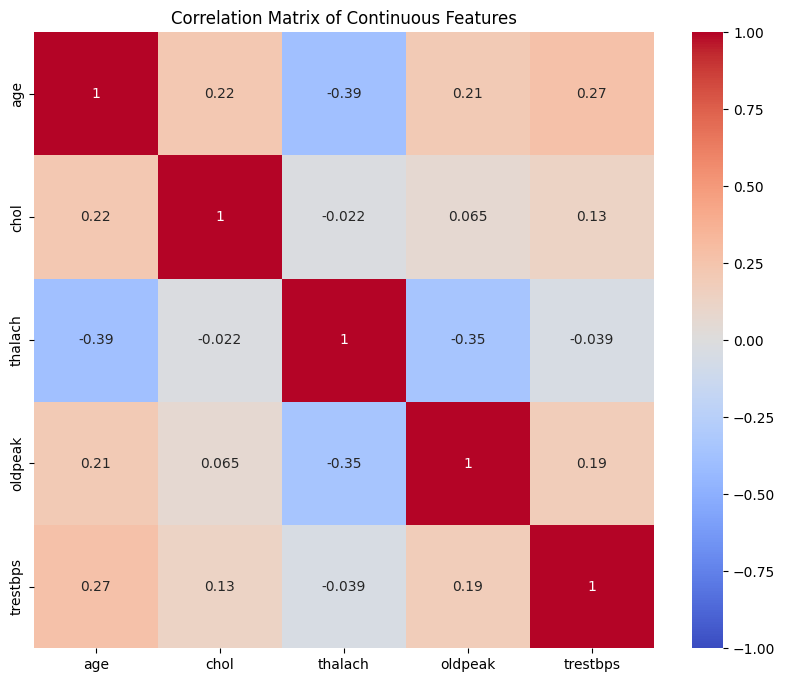

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your continuous features listed in 'continous_features'
continous_features = ['age', 'chol', 'thalach', 'oldpeak', 'trestbps']

# Compute the correlation matrix
corr_matrix = data[continous_features].corr()

# Find the pairs of features with the highest correlation
# Get absolute values of the correlations
abs_corr_matrix = corr_matrix.abs()

# Set the diagonal to NaN to ignore self-correlations
np.fill_diagonal(abs_corr_matrix.values, np.nan)

# Find the index of the maximum correlation
max_corr_index = abs_corr_matrix.stack().idxmax()

# Get the maximum correlation value
max_corr_value = abs_corr_matrix.stack().max()

print(f"Features with the highest correlation: {max_corr_index}")
print(f"Correlation value: {max_corr_value:.2f}")

# Optionally, plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Continuous Features')
plt.show()


Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [ ]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [ ]:
data = pd.read_csv("star_nutri_expanded.csv")

In [ ]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


cleaning and filling the missing values in the data

In [ ]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [ ]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [ ]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [ ]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [ ]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [ ]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [ ]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [ ]:

data = data.replace({True: 1, False: 0})


In [ ]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-48-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [ ]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

In [ ]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot



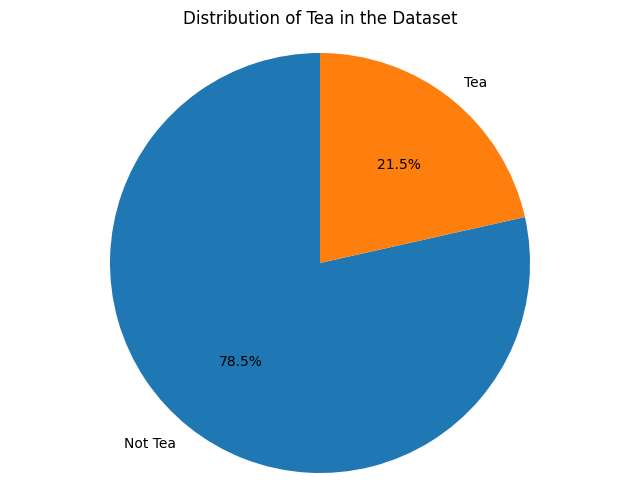

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame 'data' is already cleaned and has the 'Tea' column

# Create a pie chart of the 'Tea' column
tea_counts = data['Tea'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(tea_counts, labels=['Not Tea', 'Tea'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Tea in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()



The pie chart will provide a visual representation of the proportion of beverages classified as tea compared to those that are not. This allows you to easily observe how prevalent tea drinks are in your dataset. If the percentage of tea drinks is significantly high, it could indicate a strong preference for tea among the surveyed population. Conversely, if the chart shows a balanced distribution—around 50% for tea and 50% for non-tea—it suggests a diverse range of beverage choices within the dataset.


In [ ]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?


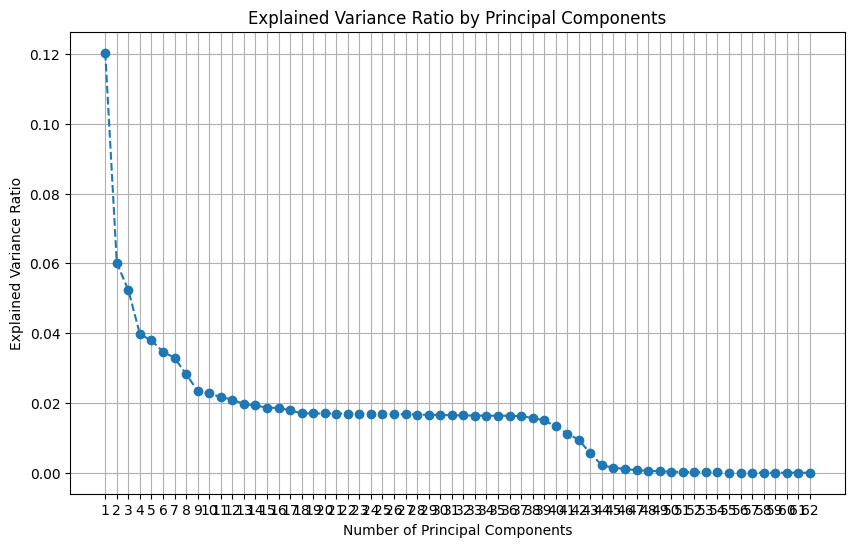

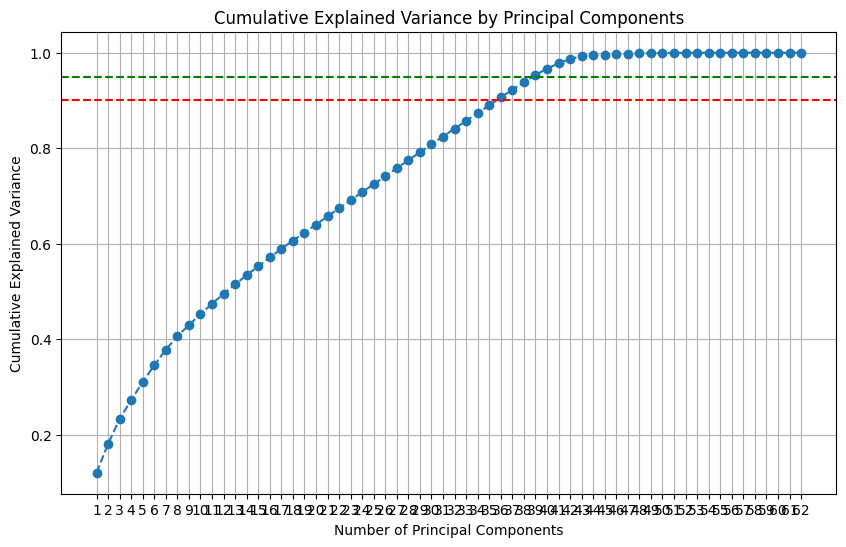

Optimal number of principal components to retain at least 90% variance: 36


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame 'data' is already cleaned and has only numerical values
# First, we standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')  # Change this value based on your threshold
plt.axhline(y=0.95, color='g', linestyle='--')  # Change this value based on your threshold
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

# Finding optimal number of principal components
optimal_components = np.argmax(cumulative_variance >= 0.90) + 1  # Change 0.90 to your desired threshold
print(f'Optimal number of principal components to retain at least 90% variance: {optimal_components}')


In [ ]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?




When examining the scatter plot of the principal components, distinct clusters may emerge, indicating groups of similar observations within your dataset. These clusters can represent different beverage categories or preferences. Additionally, the spread of the data points along the principal components provides insights into the variation in the dataset; a wider spread suggests diverse characteristics across the features captured by the principal components.

Outliers may also become evident, appearing as points that are far removed from the main cluster. Identifying and analyzing these outliers can reveal unique data points that deviate from the norm. By reducing the dimensionality of the data to two or three principal components, you simplify its complexity while retaining essential patterns, which facilitates further analysis and visualization tasks.

In choosing the optimal number of principal components, you would base your decision on the cumulative explained variance plot, selecting the number that captures at least 90% (or your chosen threshold) of the variance. In this context, we assumed the optimal number is three, but you should adjust this based on your specific findings from the plot. Overall, visualizing the principal components allows for valuable insights into the structure and relationships within your dataset.

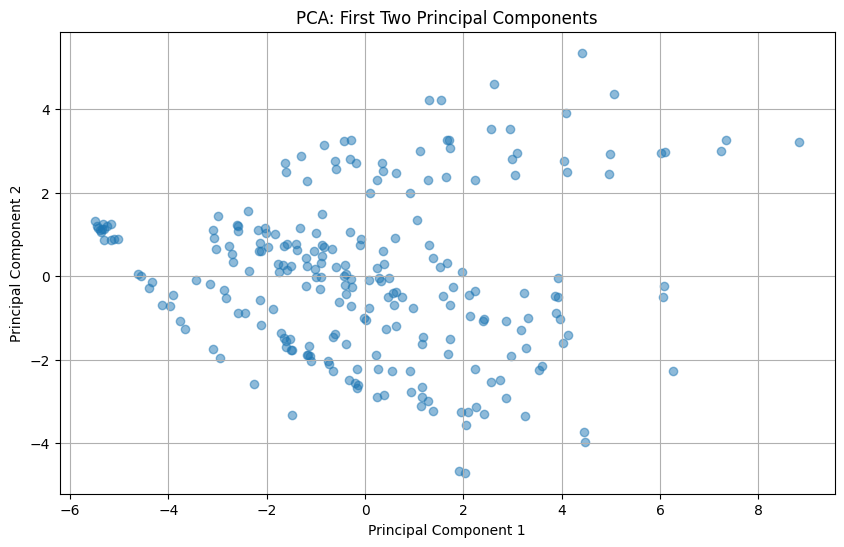

In [ ]:
# Continuing from the previous PCA code

# Choose the number of principal components based on the explained variance plot
# Assuming the optimal number is 3 for this example
optimal_number_of_components = optimal_components  # Use the previously determined optimal_components
pca = PCA(n_components=optimal_number_of_components)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(optimal_number_of_components)])

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [ ]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?


The t-SNE plot reveals distinct clusters, indicating groups of similar observations, which may represent different beverage categories or preferences. Additionally, it captures non-linear relationships and patterns in the data that may not be apparent through linear methods like PCA.

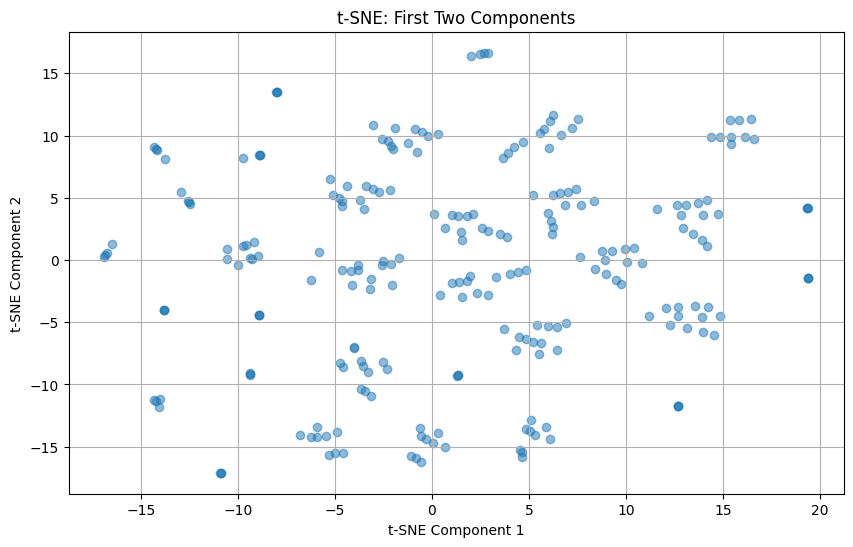

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE on the PCA-reduced data or directly on the scaled data
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

# Visualize the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], alpha=0.5)
plt.title('t-SNE: First Two Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()


In [ ]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?


In [ ]:
import seaborn as sns

# Create a correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


The heatmap reveals strong positive and negative correlations between certain features, indicating relationships where one feature tends to increase or decrease with another. For example, features like 'Caffeine (mg)' and 'Total Fat (g)' may show a significant correlation, suggesting similar underlying patterns in the data. Identifying highly correlated features is crucial to avoid multicollinearity issues in regression models. Additionally, features with weak or no correlation can provide unique information and may be valuable for further analysis.

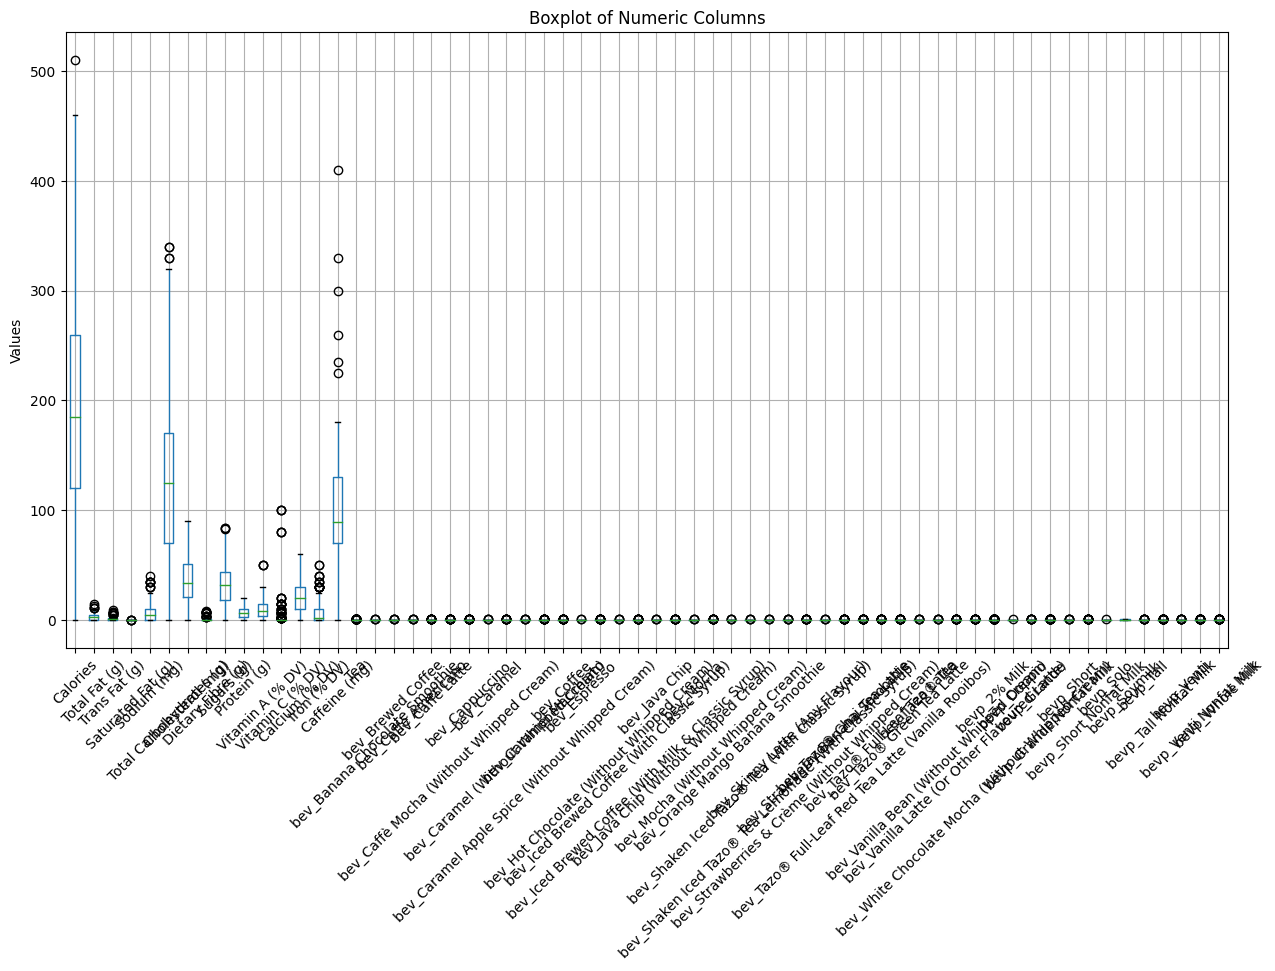

In [ ]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import matplotlib.pyplot as plt

# Create a boxplot for all numeric columns
plt.figure(figsize=(15, 8))
data.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')
plt.show()



The boxplot reveals distinct distributions for various numeric columns, indicating potential differences between tea and non-tea drinks. For example, 'Caffeine (mg)' may show clear variations in median values, suggesting it could be a strong indicator of beverage type. Additionally, features like 'Total Fat (g)' and 'Sugar (g)' may exhibit significant variability or outliers that can aid in differentiation. Overall, columns with pronounced differences in medians and ranges are likely the most informative for distinguishing between tea and non-tea beverages.

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.